In [250]:
import os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [43]:
%config InlineBackend.figure_format = 'svg'

In [197]:
df = pd.read_excel(os.path.join('data', 'RailsToTrails_National Count Data_week.xlsx'), sheet_name='Weekly Data')

In [198]:
df

,Year,Timeframe,Week,Counts (31 counters),Covid Period,Pedestrians (14 counters),Bikes (14 counters)
0,2019,Week 1,2018-12-30,167679,N,68957.0,63100.0
1,2019,Week 2,2019-01-06,82340,N,34778.0,31703.0
2,2019,Week 3,2019-01-13,62315,N,32065.0,18082.0
3,2019,Week 4,2019-01-20,75801,N,35016.0,26280.0
4,2019,Week 5,2019-01-27,75841,N,33627.0,24447.0
...,...,...,...,...,...,...,...
95,2020,Week 46,2020-11-08,155805,Y,96682.0,46105.0
96,2020,Week 47,2020-11-15,97835,Y,NaN,NaN
97,2020,Week 48,2020-11-22,101036,Y,NaN,NaN
98,2020,Week 49,2020-11-29,84123,Y,NaN,NaN


In [199]:
df.columns = ['Year','Timeframe','Week','Counts','Covid Period','Pedestrians','Bikes']

In [200]:
df

,Year,Timeframe,Week,Counts,Covid Period,Pedestrians,Bikes
0,2019,Week 1,2018-12-30,167679,N,68957.0,63100.0
1,2019,Week 2,2019-01-06,82340,N,34778.0,31703.0
2,2019,Week 3,2019-01-13,62315,N,32065.0,18082.0
3,2019,Week 4,2019-01-20,75801,N,35016.0,26280.0
4,2019,Week 5,2019-01-27,75841,N,33627.0,24447.0
...,...,...,...,...,...,...,...
95,2020,Week 46,2020-11-08,155805,Y,96682.0,46105.0
96,2020,Week 47,2020-11-15,97835,Y,NaN,NaN
97,2020,Week 48,2020-11-22,101036,Y,NaN,NaN
98,2020,Week 49,2020-11-29,84123,Y,NaN,NaN


See:
https://stackoverflow.com/questions/20972967/python-dataframe-convert-week-number-to-month

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [201]:
df['Month'] = df['Week'].dt.month_name()

In [202]:
df['Monthnumber'] = df['Week'].dt.month

In [203]:
df

,Year,Timeframe,Week,Counts,Covid Period,Pedestrians,Bikes,Month,Monthnumber
0,2019,Week 1,2018-12-30,167679,N,68957.0,63100.0,December,12
1,2019,Week 2,2019-01-06,82340,N,34778.0,31703.0,January,1
2,2019,Week 3,2019-01-13,62315,N,32065.0,18082.0,January,1
3,2019,Week 4,2019-01-20,75801,N,35016.0,26280.0,January,1
4,2019,Week 5,2019-01-27,75841,N,33627.0,24447.0,January,1
...,...,...,...,...,...,...,...,...,...
95,2020,Week 46,2020-11-08,155805,Y,96682.0,46105.0,November,11
96,2020,Week 47,2020-11-15,97835,Y,NaN,NaN,November,11
97,2020,Week 48,2020-11-22,101036,Y,NaN,NaN,November,11
98,2020,Week 49,2020-11-29,84123,Y,NaN,NaN,November,11


In [204]:
df = df.sort_values(by = ['Year', 'Monthnumber']).reset_index()

In [212]:
df_by_year_month = df.drop(['Monthnumber', 'Timeframe', 'Covid Period'], axis=1).groupby(['Year', 'Month'], sort=False).sum()

In [213]:
df_by_year_month

index   Counts  Pedestrians     Bikes
Year Month                                           
2019 January       10   296297     135486.0  100512.0
     February      26   300692     148086.0  100160.0
     March         55   573061     250845.0  155770.0
     April         62   597433     331688.0  206046.0
     May           78   781409     506648.0  247322.0
     June         120  1016059     432598.0  431963.0
     July         114   757241     300698.0  338700.0
     August       130   717433     293372.0  296854.0
     September    185   771631     304251.0  317018.0
     October      166   463611     215649.0  161075.0
     November     182   357092     105775.0   62709.0
     December      97   317914      68957.0   63100.0
2020 January      210   351469     173107.0   94169.0
     February     226   575032     252144.0  159250.0
     March        305  1399016     486159.0  373064.0
     April        262  1169136     445416.0  353963.0
     May          350  1358999     561964.0  570899.0
     June         298  1044349     405984.0  482460.0
     July         314   957362     353856.0  465406.0
     August       415  1201708     421495.0  567738.0
     September    350   808912     306525.0  367392.0
     October      366   631481     303813.0  243238.0
     November     480   593301     157879.0  116598.0
     December     149   275672      93654.0   47315.0

In [214]:
df_by_year_month.columns.get_level_values(0)  # .index.get_level_values(0)

Index(['index', 'Counts', 'Pedestrians', 'Bikes'], dtype='object')

In [ ]:
df_by_year_month.loc[[2019]]['Pedestrians'].values

array([135486., 148086., 250845., 331688., 506648., 432598., 300698.,
       293372., 304251., 215649., 105775.,  68957.])

In [237]:
df_by_year_month.loc[[2019]]['Pedestrians'].index.levels[1].values

'January'

In [114]:
df_by_year_month.unstack()['Bikes (14 counters)']

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2019,176216.0,400882.0,0.0,100211.0,112885.0,335232.0,400183.0,140006.0,201622.0,139384.0,197274.0,277334.0
2020,306849.0,564227.0,0.0,163334.0,92864.0,481893.0,495865.0,274212.0,506406.0,158947.0,377427.0,419468.0


In [240]:
months[:]

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [241]:
plt.style.use('default')

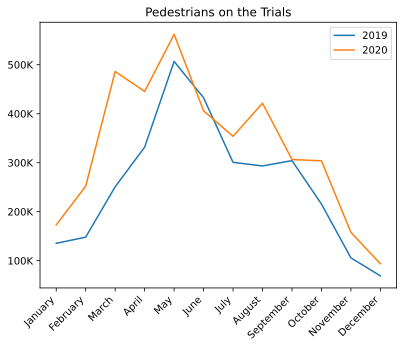

In [256]:
fig, ax = plt.subplots()

months = df_by_year_month.loc[[2019]]['Pedestrians'].index.levels[1].values 

ax.plot(months, df_by_year_month.loc[[2019]]['Pedestrians'].values, label='2019')
ax.plot(months, df_by_year_month.loc[[2020]]['Pedestrians'].values, label='2020')

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)
plt.setp(labels, ha='right')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'K'))

plt.setp(ax, title='Pedestrians on the Trials')

ax.legend()
plt.show()

In [ ]:
from bokeh.plotting import figure
from bokeh.plotting import show
from bokeh.plotting import save
from bokeh.plotting import output_file
from bokeh.io import output_notebook
from bokeh.io import reset_output